# Analiza podatkov

Avtorica: Sara Polajnar

Vsi podatki, uporabljeni v nalogi so bili vzeti iz [spletne strani](https://worldathletics.org/records/toplists/sprints/60-metres/all/women/senior/2024?regionType=world&timing=electronic&windReading=regular&page=1&bestResultsOnly=true&maxResultsByCountry=all&eventId=10229684&ageCategory=senior) dne 10.10.2024.

Naložimo potrebne podatke in knjižnice.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

tabela_podatkov = pd.read_csv('pridobivanje_podatkov/podatki.csv')

## Vsi podatki
Za začetek si poglejmo vse zajete podatke:

In [46]:
tabela_podatkov

,uvrstitev,rezultat [s],ime tekmovalke,datum rojstva,država,pozicija,datum dogodka,skupne točke,kontinent
0,1,6.98,Julien ALFRED,10 JUN 2001,LCA,1,02 MAR 2024,1227,Severna in Srednja Amerika
1,1,6.98,Ewa SWOBODA,26 JUL 1997,POL,1sf1,02 MAR 2024,1227,Evropa
2,3,7.02,Zaynab DOSSO,12 SEP 1999,ITA,2,06 FEB 2024,1213,Evropa
3,3,7.02,Aleia HOBBS,24 FEB 1996,USA,1,17 FEB 2024,1213,Severna in Srednja Amerika
4,5,7.03,Shashalee FORBES,10 MAY 1996,JAM,1f2,27 JAN 2024,1209,Severna in Srednja Amerika
...,...,...,...,...,...,...,...,...,...
9188,9059,8.30,Mimi ZAJEC,2012,SLO,3,11 MAY 2024,816,Evropa
9189,9059,8.30,Thea MOODY,2010,CZE,3h1,01 JUN 2024,809,Evropa
9190,9059,8.30,Simona LELOVSKÁ,2007,SVK,5f1,09 JUN 2024,809,Evropa
9191,9059,8.30,Ema VORÁČKOVÁ,2008,CZE,4f2,10 AUG 2024,809,Evropa


## Kateri rezultat je doseglo največ tekmovalk?

In [159]:
def st_tekmovalk_na_rezultat(tabela):                                   #koliko tekmovalk je doseglo posamezen rezultat
    tabela['rezultat [s]'] = tabela['rezultat [s]'].astype(float)       #rezultat spremeni v stevilko
    pogostost_rezultatov = tabela['rezultat [s]'].value_counts()        #kolikokrat se posamezna vrednost pojavi

    return pogostost_rezultatov

najnizji_rezultat = tabela_podatkov['rezultat [s]'].min()
najvisji_rezultat = tabela_podatkov['rezultat [s]'].max() 

print(st_tekmovalk_na_rezultat(tabela_podatkov).head(5))                #največkrat zasedenih 5 
print(f'Najboljši rezultat: {najnizji_rezultat}s')
print(f'Najslabši rezultat: {najvisji_rezultat}s')


rezultat [s]
8.18    175
8.20    175
8.25    159
8.26    157
8.09    155
Name: count, dtype: int64
Najboljši rezultat: 6.98s
Najslabši rezultat: 8.3s


Vidimo, da je največ tekmovalk doseglo rezultat 8.18 in 8.20, kar se opazno razlikuje od najboljšega, ki znaša 6.98, ni pa tako daleč od najslabšega: 8.30.

Vsi rezultati razporejeni glede na to, koliko tekmovalk jih je doseglo: 

Povprečni rezultat na tekmovalko znaša: 7.94s


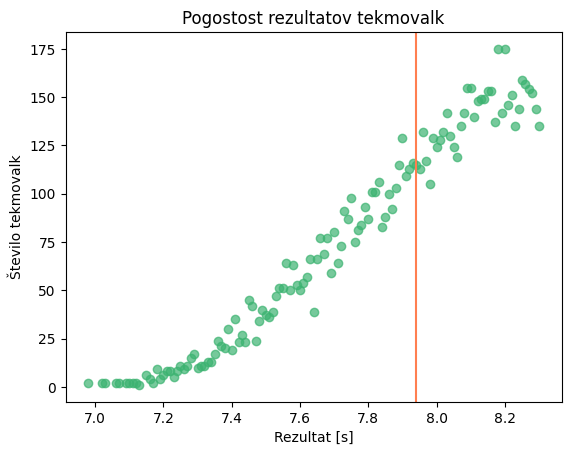

In [160]:
rezultati = st_tekmovalk_na_rezultat(tabela_podatkov)
povprecni_rezultat = round(tabela_podatkov['rezultat [s]'].sum() / (tabela_podatkov['rezultat [s]'].index.max() + 1), 2)
print(f'Povprečni rezultat na tekmovalko znaša: {povprecni_rezultat}s')

plt.scatter(rezultati.index, rezultati.values, alpha=0.7, color='MediumSeaGreen')       #alpha doloca prosojnost točk
plt.title('Pogostost rezultatov tekmovalk')  
plt.xlabel('Rezultat [s]')  
plt.ylabel('Število tekmovalk')
plt.axvline(x=povprecni_rezultat, color='Coral')                                        #dodamo navpično premico povprečja


## Katere države zasegajo najboljše rezultate?

država
ECU    7.29
CGO    7.30
GAB    7.34
SMR    7.37
TTO    7.38
       ... 
KSA    8.20
SEN    8.22
GBS    8.23
CAF    8.27
KEN    8.28
Name: rezultat [s], Length: 129, dtype: float64
LCA rezultat: 7.6s, pozicija: 20
POL rezultat: 7.97s, pozicija: 82
SLO rezultat: 8.01s, pozicija: 99


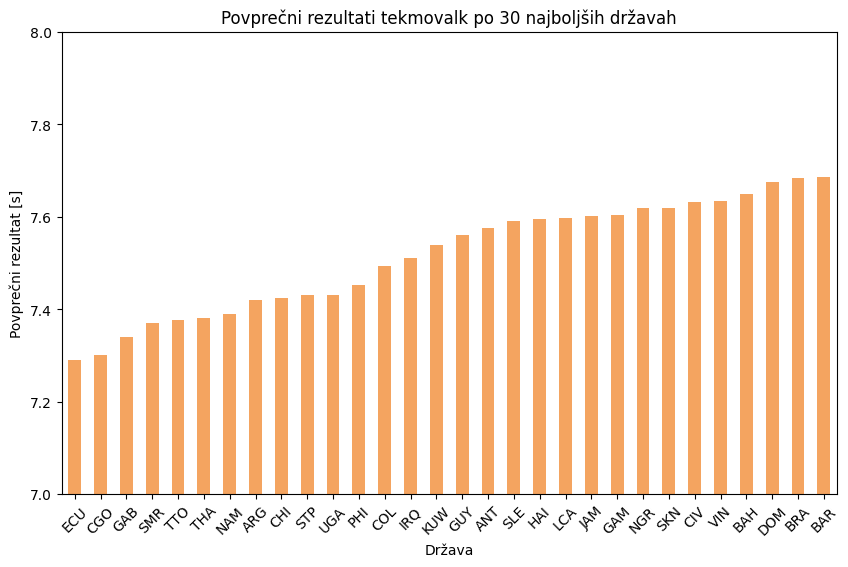

In [198]:
rezultat_za_drzavo = tabela_podatkov.groupby('država')['rezultat [s]'].mean()
urejeni_rezultati_za_drzavo = rezultat_za_drzavo.sort_values()                #razverščeni podatki glede rezultate

def rezultat(drzava):
    rezultat = float(round(urejeni_rezultati_za_drzavo.loc[drzava], 2))      
    return rezultat

def pozicija(drzava):
    pozicija = urejeni_rezultati_za_drzavo.index.get_loc(drzava) + 1         #+1 ker se indeksiranje zacne pri 0
    return pozicija

print (round(urejeni_rezultati_za_drzavo, 2))
print (f'LCA rezultat: {rezultat('LCA')}s, pozicija: {pozicija('LCA')}')      #izpis rezultatov in mest, ki jih zasedeta državi 
print (f'POL rezultat: {rezultat('POL')}s, pozicija: {pozicija('POL')}')      #z najboljšim rezultatom in Slovenija
print (f'SLO rezultat: {rezultat('SLO')}s, pozicija: {pozicija('SLO')}')

najboljsih_trideset = rezultat_za_drzavo.nsmallest(30)

plt.figure(figsize=(10, 6))
najboljsih_trideset.plot(kind='bar', color='SandyBrown')
plt.title('Povprečni rezultati tekmovalk po 30 najboljših državah')
plt.xlabel('Država')
plt.ylabel('Povprečni rezultat [s]')
plt.xticks(rotation=45)
plt.ylim(7, 8)
plt.show()

Vidimo, da povprečno najboljše tekmovalke prihajajo iz Ekvadorja, kar ne pomeni, da tudi absolutna zmagovalka prihaja iz te države. Absolutni zmagovalki namreč prihajata iz Poljske in otoške države Sveta Lucija z rezultatom 6.98.

Za primerjavo si poglejmo še države, ki se po uvrstitvah nahajajo okoli Slovenije:

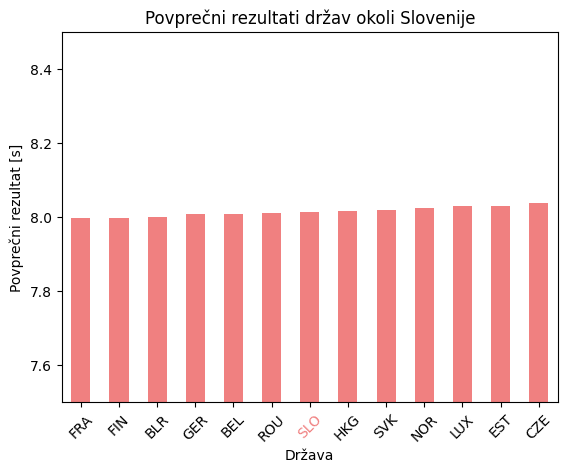

In [185]:
indeks_slo = pozicija('SLO')
zacetni_indeks_drzave = indeks_slo - 7
koncni_indeks_drzave = indeks_slo + 6
drzave_okoli_slo = urejeni_rezultati_za_drzavo[zacetni_indeks_drzave : koncni_indeks_drzave]

graf = drzave_okoli_slo.plot(kind='bar', color='LightCoral')
plt.title('Povprečni rezultati držav okoli Slovenije')
plt.xlabel('Država')
plt.ylabel('Povprečni rezultat [s]')
plt.xticks(rotation=45)
plt.ylim(7.5, 8.5)

oznake = graf.get_xticklabels()
for oznaka in oznake:
    if oznaka.get_text() == 'SLO':
        oznaka.set_color('LightCoral')
    

## Katera letnica rojstva je zmagovalna?

Najprej si poglejmo koliko tekmovalk je rojenih na posameno leto:

Maksimalno število tekmovalk je rojenih leta 2007, bilo jih je kar 893.


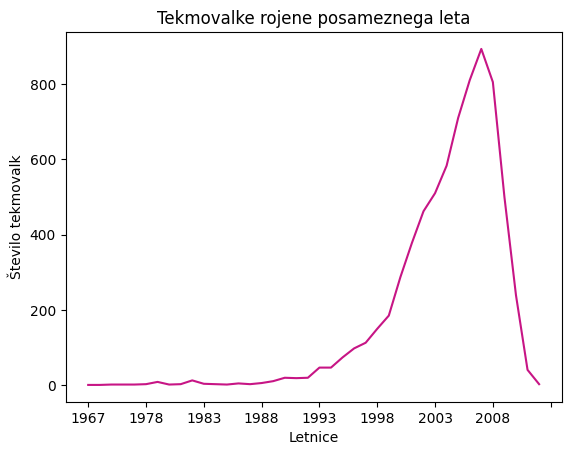

In [267]:
def izlusci_leto(datum):                            #datumi so podani v oblikah: %d %m %y, '', %y
    letnice = []                                    #zato naredimo seznam letnic glede na posebnosti
    for dat in datum: 
        niz_dat = str(dat)
        if len(niz_dat) == 4:
            letnice.append(dat)
        elif len(niz_dat) > 4:
            del_datuma = niz_dat.split()
            letnice.append(del_datuma[-1])
    return letnice

leta = pd.DataFrame(izlusci_leto(tabela_podatkov['datum rojstva']), columns=['Leto'])       #vsa leta
st_tekmovalk_na_leto = leta['Leto'].value_counts().sort_index()                             #kolikokrat se posamezno leto pojavi

st_tekmovalk_na_leto.plot(kind='line', color='MediumVioletRed')
plt.title('Tekmovalke rojene posameznega leta')
plt.xlabel('Letnice')
plt.ylabel('Število tekmovalk')

print(f'Maksimalno število tekmovalk je rojenih leta {st_tekmovalk_na_leto.idxmax()}, bilo jih je kar {st_tekmovalk_na_leto.max()}.')

Upoštevati moramo, da vsi uporabljeni podatki nimajo podatka o rojstvu oseb, zato tudi graf ni 100% natančen.

## Iz katerega kontinenta prihajajo najboljše tekmovalke?